<a href="https://colab.research.google.com/github/Pravallika1234uppala/ML/blob/main/ML%20Models/Supervised%20Learning/Classification%20Models/Naive%20Bayes%20Algorithm/Multinomial%20Naive's%20Bayes/Naive_Baye's_Classification_Algorithm_Multinomial_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MULTINOMIAL NAIVE BAYES:

In [166]:
'''
 multinomial is specifically used in NLP Problem statements.

When we have Sparse matrix we can either use bernouli or Multinomial Naive Bayes.

So, for NLP can use multinomial and Bernouli Naive Bayes.

'''


'\n multinomial is specifically used in NLP Problem statements.\n\nWhen we have Sparse matrix we can either use bernouli or Multinomial Naive Bayes.\n\nSo, for NLP can use multinomial and Bernouli Naive Bayes.\n\n'

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
df = pd.read_csv("spamham.csv")

In [169]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [170]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [171]:
df.drop(['Unnamed: 0', 'label'], axis=1, inplace=True)

In [172]:
df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [173]:
df.rename(columns={'label_num': 'Spam'}, inplace=True)

In [174]:
df.columns

Index(['text', 'Spam'], dtype='object')

In [175]:
df

,text,Spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [176]:
df.dtypes

,0
text,object
Spam,int64


In [177]:
df.isnull().sum()

,0
text,0
Spam,0


<Axes: >

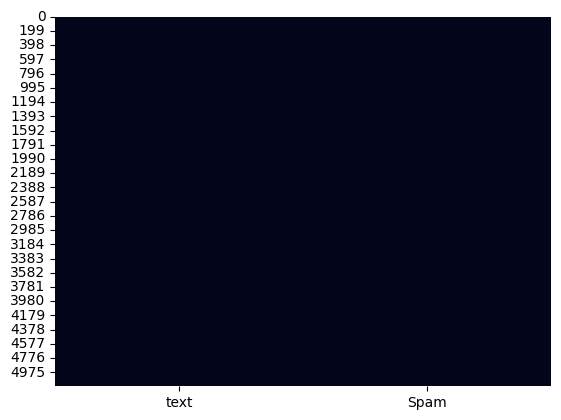

In [178]:
sns.heatmap(df.isnull(), cbar=False)

In [179]:
import nltk
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [180]:
spam_ham=df['Spam'].value_counts()

In [181]:
spam_ham

,count
Spam,
0,3672
1,1499


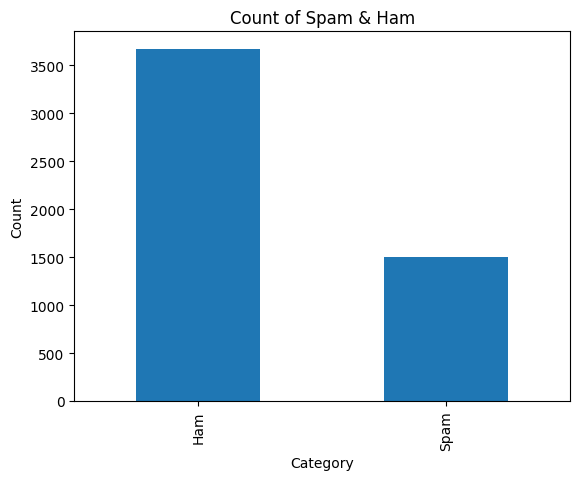

In [182]:
spam_ham.plot(kind='bar', legend=False)

plt.title("Count of Spam & Ham")
plt.xlabel("Category")
plt.ylabel("Count")

plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

In [183]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [184]:
#removing punctunation from text and lowering it
import re
import string
from nltk.corpus import stopwords

stop_wrds = set(stopwords.words('english'))

def remove_punct_lower_stpwrd(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\r\n', ' ', text)
  text = ' '.join([wrd for wrd in text.split() if wrd not in stop_wrds])
  return text


df['text']=df['text'].apply(remove_punct_lower_stpwrd)

In [185]:
df

,text,Spam
0,subject enron methanol meter 988291 follow not...,0
1,subject hpl nom january 9 2001 see attached fi...,0
2,subject neon retreat ho ho ho around wonderful...,0
3,subject photoshop windows office cheap main tr...,1
4,subject indian springs deal book teco pvr reve...,0
...,...,...
5166,subject put 10 ft transport volumes decreased ...,0
5167,subject 3 4 2000 following noms hpl take extra...,0
5168,subject calpine daily gas nomination julie men...,0
5169,subject industrial worksheets august 2000 acti...,0


In [186]:
#now text is cleaned
#converting text to numerical/vectors using tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['Spam']

In [187]:
X

<5171x50342 sparse matrix of type '<class 'numpy.float64'>'
	with 359124 stored elements in Compressed Sparse Row format>

In [188]:
#now X or text is a sparse matrix with 0's and 1 's (into numericals)

#splitting data for training and testing:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42)


In [189]:
X_train.shape

(3671, 50342)

In [190]:
X_test.shape

(1500, 50342)

In [191]:
#here there are 50342 vocabulary
y_train.shape

(3671,)

In [192]:
y_test.shape

(1500,)

In [193]:
#model intialization
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [194]:
#finding error & accuracy:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:", classification_report(y_test, y_pred))


Accuracy: 91.26666666666667
Classification Report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1084
           1       1.00      0.69      0.81       416

    accuracy                           0.91      1500
   macro avg       0.95      0.84      0.88      1500
weighted avg       0.92      0.91      0.91      1500



In [195]:
error = mean_squared_error(y_test, y_pred)
print("Error:", error)

Error: 0.08733333333333333


In [196]:
#prediction for new msg
def predictions(text):
  text = remove_punct_lower_stpwrd(text)
  vectorize_text = vectorizer.transform([text])
  predict_spam = model.predict(vectorize_text)
  return "Spam" if predict_spam[0]==1 else "Ham"

print(predictions("Congrats, You won lottery!!!"))

Ham
